## 1.Introducton

This project aims to uncover insights from the connection between movie budgets and gross revenue in the film industry. By using Ordinary Least Squares Regression, we'll analyze a dataset sourced from [Kaggle](https://www.kaggle.com/datasets/danielgrijalvas/movies).

#### Dataset description

There are 7668 movies in the dataset (1980-2016). Each movie has the following attributes:

`budget`: the budget of a movie. Some movies don't have this, so it appears as 0

`company`: the production company

`country`: country of origin

`director`: the director

`genre`: main genre of the movie.

`gross`: revenue of the movie

`name`: name of the movie

`rating`: rating of the movie (R, PG, etc.)

`released`: release date (YYYY-MM-DD)

`runtime`: duration of the movie

`score`: IMDb user rating

`votes`: number of user votes

`star`: main actor/actress

`writer`: writer of the movie

`year`: year of release

#### Imports and Data Loading

In [1]:
# import packages
import pandas as pd 
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from matplotlib.pyplot import figure
%matplotlib inline
# Adjust the configuration of the plots we will create
matplotlib.rcParams['figure.figsize'] = (12,8) 

In [2]:
# Load the dataset
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## 2.Data Cleaning and Exploration 

In [3]:
df.shape

(7668, 15)

The dataset has 7668 `rows` and 15 `columns` 

In [4]:
#Get an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# Impute columns with <b>missing values</b>
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [93]:
# Drop the missing values and show the number of remaining columns and rows
df2  = df.dropna()
df2.shape

(5421, 15)

we remain with 5421 `columns` after removing the missing values in the dataset. 

## 3.Exploratory Data Analysis and Regression

#### <b>Question :Does the relationship between the budget and gross revenue of movies follow a linear pattern?</b>


Let's check if our variables satisfy the assumption of linearity in order to perform the Regression task on it. A linear relationship means that a change in the target variable due to a one-unit change in the feature is constant, regardless of the value of feature variable.

If we fit a regression model to a non-linear dataset, it will fail to adequately capture the relationship in the data - resulting in a mathematically inappropriate model. To check for linearity, we can produce scatter plots of each feature against the target variable. The intuition here is that we are looking for obvious linear relationships

In this case our target varible is the ` gross revenue` while the predictor variable is the `budget`

### Linearity

In [92]:
#Assign the predictor and target variables to X and y respectively 
X = df2['budget']
y = df2['gross']

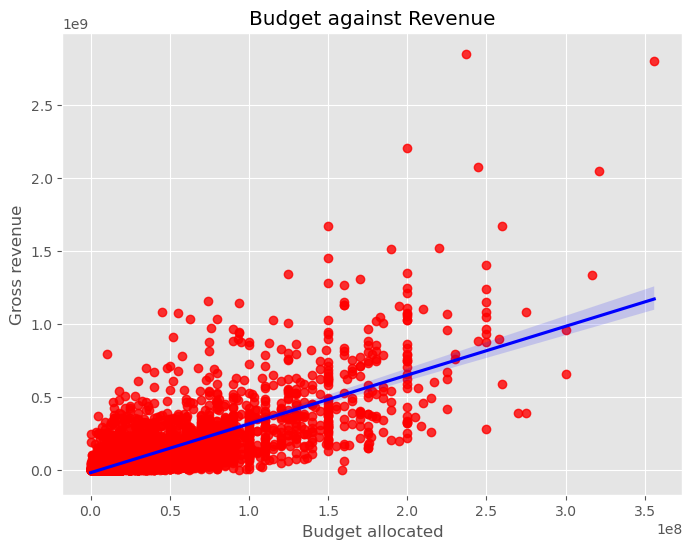

In [97]:
# The plot size
plt.figure(figsize=(8,6))

#Plot the regression plot
sns.regplot(x=X, y=y, data = df2, scatter_kws={'color':'r'}, line_kws={'color':'b'})
plt.xlabel('Budget allocated')
plt.ylabel('Gross revenue')
plt.title('Budget against Revenue')
plt.grid(True)  # Add grid if desired
plt.show()


We observe a clear positive linear relationship between the budget allocated and gross revenue. As the budget allocated to a project increases, there is a corresponding increase in the gross revenue generated.

The positive slope of the regression line fitted to the scatter plot indicates that for every unit increase in budget allocation, there is, on average, a proportional increase in gross revenue. This suggests that investing more resources into a project tends to yield higher returns in terms of revenue generation.

### Normality 

<b>Question : Are both the budget and gross revenue variables normally distributed?

Let's check if both `gross revenue` and `budget` are normally distributed . If they are, then it is likely that the residuals are also normally distributed.

<function matplotlib.pyplot.show(close=None, block=None)>

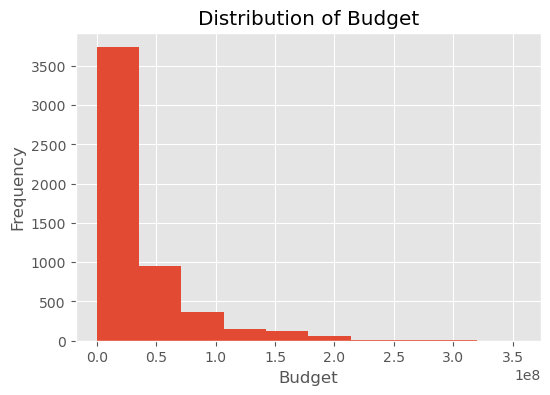

In [94]:
# Set the figure size
plt.figure(figsize=(6,4))

#plot the histogram of budget
plt.hist(X)
plt.title('Distribution of Budget')
plt.xlabel("Budget")
plt.ylabel('Frequency')

#display the plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

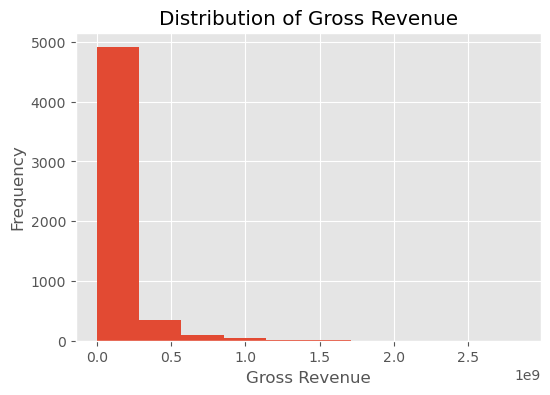

In [98]:
#set the figure size
plt.figure(figsize=(6,4))

#plot the histogram of gross revenue
plt.hist(y)
plt.title('Distribution of Gross Revenue')
plt.xlabel("Gross Revenue")
plt.ylabel('Frequency')
plt.show

Both the distribution of buget and revenue are not distributed normally. We might consider the logarithmic form of the variable in orrder that they exihibit a normal distribution.

<b>Question : How is the Ordinary Least Squares (OLS) approach applied to estimate the parameters of the linear regression model?

### Building the Model

In [22]:
import statsmodels.formula.api as sm

<b>Regression formula string</b>

In [26]:
#Generate the formular string 
formular_string ='gross' + ' ~ ' + 'budget'
formular_string

'gross ~ budget'

<b>Implementing the Ordinary Least Squares (OLS) approach for linear regression.

In [27]:
#fit the model using the df2
model=sm.ols(formula=formular_string, data=df2)
fitted_model = model.fit()

#output the fitted model
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     6569.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:42:48   Log-Likelihood:            -1.0880e+05
No. Observations:                5421   AIC:                         2.176e+05
Df Residuals:                    5419   BIC:                         2.176e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.686e+07   2.26e+06     -7.452      0.0

### <b>Interpretting Results summary

<b>Question : What is the y-intercept and slope

The y-intercept is at -16,860,000 and slope at  3.3351.

<b> Question: What is the Linear Expression that would express the relationship between the budget and the gross reveue</b> in the form of y = mx + c ? 
    
    

- gross revenue = 3.3351 * budget - 16,860,000 

<b>Question : How well does the budget explain the variability in gross revenue?

In the linear regression model predicting gross revenue based on movie budget, the y-intercept is estimated to be -1.686e+07 (approximately -16.86 million), and the coefficient for the budget variable is 3.3351. The interpretation of this could be : For every unit increase in the movie budget (in the same scale as the data), the gross revenue is estimated to increase by approximately $3.34 million on average. 

#### Checking model assumptions

<b> Question : Are the residuals of the regression model normally distributed?


#### <b>Normality</b>

We want to check if the residuals are normally distributed

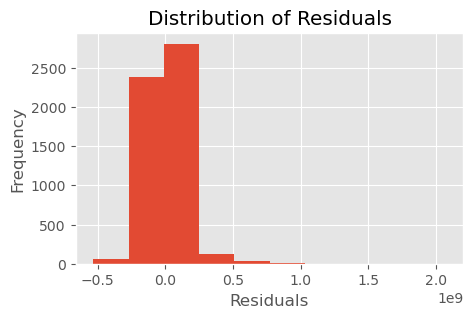

In [42]:
#Get the residuals

residuals = fitted_model.resid

# Check whetherr the residuals are normally distributed
plt.figure(figsize=(5,3))
plt.hist(residuals)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


Based on the above histogam of residuals, it can be observed that the distribution closely resembles a bell-shaped curve, characteristic of a normal distribution. This suggests that the residuals exhibit approximate normality, meeting the asssumption of normality . Therefore, the relationship between the independent and dependent variables is adequately captured by the linear model.

<b>Confirming the assumption of Normality

<Figure size 500x300 with 0 Axes>

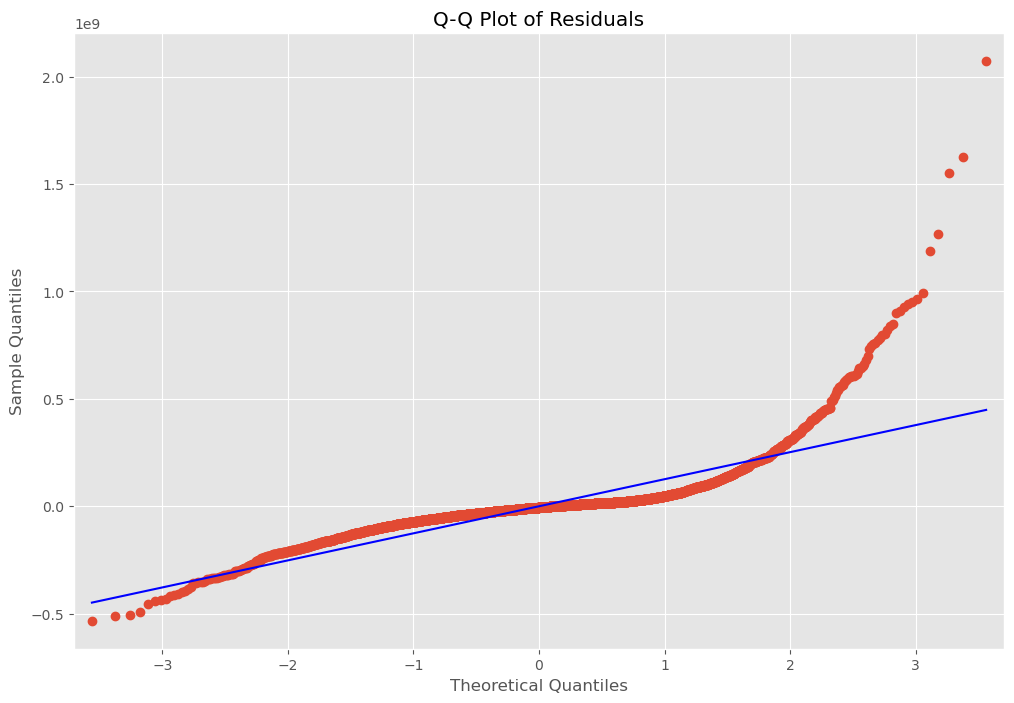

In [77]:
from statsmodels.graphics.gofplots import qqplot
# Create a Q-Q plot to confirm normality assumption 

# Set the figure size
plt.figure(figsize=(5, 3))

# Create a Q-Q plot to confirm normality assumption 
qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.gca().get_lines()[1].set_color('b')  # Set line color to blue
plt.show()

In the Q-Q plot above, the points closely follow a straight diagonal line that trends upward. While there are some deviations from the line, particularly at the extremes, the overall pattern suggests a good fit to the normal distribution. Therefore, we can conclude that the normality assumption is met for the residuals.

<b> Question : Does the variability in the residuals of the regression model remain consistent across different budget levels?


#### <b> Homoscedasticity </b>

We want to check whether the assumption of homoscedaticity is met.

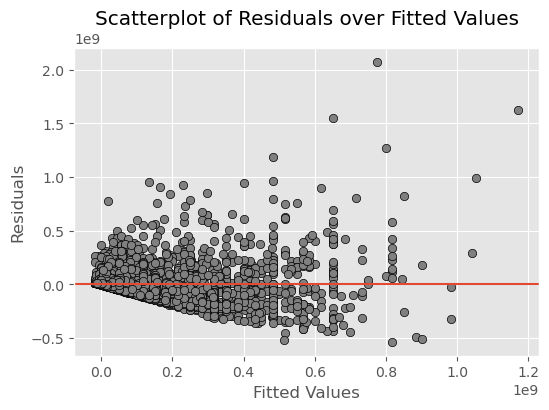

In [78]:
#obtain the fitted values of X
fitted_values = fitted_model.predict(X)

#size of the plot 
plt.figure(figsize=(6,4))
plt.scatter(fitted_values, residuals, edgecolors='k',color='grey')
plt.axhline(0)
plt.title("Scatterplot of Residuals over Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

From the above plot, there is no discernible pattern across different values. This suggests that the variance of the residuals remains relatively constant across the range of predicted values. 
The assumption of homoscedasticity is met


## 4.Conclusions

<b> Question : What insights can be drawn from the summary of the regression model results, particularly regarding the coefficients, p-values, and goodness-of-fit measures?

In the linear regression model predicting gross revenue based on movie budget, the y-intercept is estimated to be -1.686e+07 (approximately -16.86 million), and the coefficient for the budget variable is 3.3351. The interpretation of this could be : For every unit increase in the movie budget (in the same scale as the data), the gross revenue is estimated to increase by approximately $3.34 million on average. 

The results are highly statistically significant, with a p-value of 0.000. This indicates a very low probability of observing such extreme results under the null hypothesis of no relationship between movie budget and gross revenue. Additionally, the R-squared value for the model is 0.548, suggesting that approximately 54.8% of the variance in gross revenue can be explained by the movie budget. 

The 95% confidence interval for the budget coefficient is [3.254, 3.416], indicating that there is a 95% probability that the true coefficient lies within this interval. Overall, the model suggests a strong positive relationship between movie budget and gross revenue, with higher budgets generally associated with higher gross revenues.

#### Recommendation 

Given the significant positive relationship between movie budget and gross revenue (with a coefficient of 3.3351 and a p-value of 0.000), consider allocating resources towards increasing the budget for movies that have strong potential for high returns. Prioritize projects with promising scripts, talented casts, and strong market appeal to maximize the impact of the budget on revenue generation.

<b>Limitations of the project</b>


The Project is solely focussed on Ordinary Least Squares Regression modelling.